In [1]:
import pickle

In [2]:
import numpy as np

In [3]:
with open("train_qa.txt","rb") as fp:
    train_data = pickle.load(fp)

In [4]:
type(train_data)

list

In [5]:
len(train_data)

10000

In [6]:
with open("test_qa.txt","rb") as fp:
    test_data= pickle.load(fp)

In [7]:
len(test_data)

1000

In [8]:
type(test_data)

list

In [9]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [10]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [11]:
train_data[0][2]

'no'

In [12]:
all_data = train_data + test_data

In [13]:
type(all_data)

list

In [14]:
len(all_data)

11000

In [15]:
vocab = set()

In [16]:
for story,question,answer in all_data:
    vocab=vocab.union(set(story))
    vocab=vocab.union(set(question))

In [17]:
vocab.add("yes")
vocab.add("no")

In [18]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [19]:
len(vocab)

37

In [20]:
vocab_len = len(vocab) +1

In [21]:
max_story_len = max([len(data[0]) for data in all_data])
max_story_len

156

In [22]:
max_ques_len = max([len(data[1]) for data in all_data])
max_ques_len

6

In [23]:
from keras.preprocessing.sequence import pad_sequence
from keras.preprocessing.text import Tokenizer

ImportError: cannot import name 'pad_sequence' from 'keras.preprocessing.sequence' (C:\Users\nagap\anaconda3\envs\pranav\Lib\site-packages\keras\preprocessing\sequence\__init__.py)

In [24]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer



In [41]:
tokenizer = Tokenizer(filters=[])

In [42]:
tokenizer.fit_on_texts(vocab)

In [43]:
tokenizer.word_index

{'sandra': 1,
 'is': 2,
 'got': 3,
 'the': 4,
 'bathroom': 5,
 'picked': 6,
 'bedroom': 7,
 'milk': 8,
 'grabbed': 9,
 'no': 10,
 'put': 11,
 'took': 12,
 'garden': 13,
 '.': 14,
 'john': 15,
 'mary': 16,
 'hallway': 17,
 'dropped': 18,
 'journeyed': 19,
 'up': 20,
 'moved': 21,
 'in': 22,
 'office': 23,
 'there': 24,
 'to': 25,
 'discarded': 26,
 'travelled': 27,
 'back': 28,
 'yes': 29,
 'left': 30,
 'football': 31,
 'apple': 32,
 'kitchen': 33,
 'daniel': 34,
 '?': 35,
 'went': 36,
 'down': 37}

In [44]:
train_story_text = []
train_question_text = []
train_answers = []

for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [45]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [46]:
len(train_story_seq)

10000

In [47]:
train_story_seq

[[16, 21, 25, 4, 5, 14, 1, 19, 25, 4, 7, 14],
 [16,
  21,
  25,
  4,
  5,
  14,
  1,
  19,
  25,
  4,
  7,
  14,
  16,
  36,
  28,
  25,
  4,
  7,
  14,
  34,
  36,
  28,
  25,
  4,
  17,
  14],
 [16,
  21,
  25,
  4,
  5,
  14,
  1,
  19,
  25,
  4,
  7,
  14,
  16,
  36,
  28,
  25,
  4,
  7,
  14,
  34,
  36,
  28,
  25,
  4,
  17,
  14,
  1,
  36,
  25,
  4,
  33,
  14,
  34,
  36,
  28,
  25,
  4,
  5,
  14],
 [16,
  21,
  25,
  4,
  5,
  14,
  1,
  19,
  25,
  4,
  7,
  14,
  16,
  36,
  28,
  25,
  4,
  7,
  14,
  34,
  36,
  28,
  25,
  4,
  17,
  14,
  1,
  36,
  25,
  4,
  33,
  14,
  34,
  36,
  28,
  25,
  4,
  5,
  14,
  34,
  6,
  20,
  4,
  31,
  24,
  14,
  34,
  36,
  25,
  4,
  7,
  14],
 [16,
  21,
  25,
  4,
  5,
  14,
  1,
  19,
  25,
  4,
  7,
  14,
  16,
  36,
  28,
  25,
  4,
  7,
  14,
  34,
  36,
  28,
  25,
  4,
  17,
  14,
  1,
  36,
  25,
  4,
  33,
  14,
  34,
  36,
  28,
  25,
  4,
  5,
  14,
  34,
  6,
  20,
  4,
  31,
  24,
  14,
  34,
  36,
  25,
  4,


In [56]:
def vectorized_stories(data,word_index=tokenizer.word_index,max_story_len=max_story_len,max_ques_len=max_ques_len):
    X = []
    Xq=[]
    Y = []
    
    for story,query,answer in data:
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query]
        y = np.zeros(len(word_index)+1)
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
    return (pad_sequences(X,maxlen=max_story_len),pad_sequences(Xq,maxlen=max_ques_len),np.array(Y))

In [51]:
!git remote add origin https://github.com/pranav-tec/chat_bot.git

error: remote origin already exists.


In [35]:
!git init

Initialized empty Git repository in C:/Users/nagap/OneDrive/Documents/chatbot/.git/


In [36]:
!git remote add origin https://github.com/pranav-tec/chat_bot.git

In [37]:
!git add .

In [38]:
!git commit -m "maintain"

[master (root-commit) e886841] maintain
 4 files changed, 28638 insertions(+)
 create mode 100644 .ipynb_checkpoints/Chatbot-checkpoint.ipynb
 create mode 100644 Chatbot.ipynb
 create mode 100644 test_qa.txt
 create mode 100644 train_qa.txt


In [39]:
!git push origin master

To https://github.com/pranav-tec/chat_bot.git
 * [new branch]      master -> master


In [57]:
inputs_train,queries_train,answers_train = vectorized_stories(train_data)

In [58]:
inputs_test,queries_test,answers_test = vectorized_stories(test_data)

In [59]:
inputs_train

array([[ 0,  0,  0, ...,  4,  7, 14],
       [ 0,  0,  0, ...,  4, 17, 14],
       [ 0,  0,  0, ...,  4,  5, 14],
       ...,
       [ 0,  0,  0, ...,  4,  7, 14],
       [ 0,  0,  0, ...,  8, 24, 14],
       [ 0,  0,  0, ..., 32, 24, 14]])

In [60]:
from tensorflow import keras

In [62]:
from keras.models import Sequential,Model
from keras.layers import Embedding
from keras.layers import Input,Activation,Dense,Permute,Dropout,add,dot,concatenate,LSTM

In [63]:
input_sequence = Input((max_story_len))
question = Input((max_ques_len))

In [64]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_len,output_dim=64))
input_encoder_m.add(Dropout(0.3))

In [65]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_len,output_dim=max_ques_len))
input_encoder_c.add(Dropout(0.3))

In [67]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_len,output_dim=64,input_length=max_ques_len))
question_encoder.add(Dropout(0.3))

In [69]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [70]:
match = dot([input_encoded_m,question_encoded],axes=(2,2))
match = Activation('softmax')(match)

In [72]:
response = add([match,input_encoded_c])
response = Permute((2,1))(response)

In [73]:
answer = concatenate([response,question_encoded])

In [74]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [75]:
answer = LSTM(32)(answer)

In [76]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_len)(answer)

In [77]:
answer = Activation('softmax')(answer)

In [79]:
model = Model([input_sequence,question],answer)
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [80]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 156)]                0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 sequential (Sequential)     (None, None, 64)             2432      ['input_1[0][0]']             
                                                                                                  
 sequential_3 (Sequential)   (None, 6, 64)                2432      ['input_2[0][0]']             
                                                                                              

In [82]:
history = model.fit([inputs_train,queries_train],answers_train,batch_size=32,epochs=20,validation_data=([inputs_test,queries_test],answers_test))

Epoch 1/20
313/313 [==============================] - 10s 31ms/step - loss: 0.6955 - accuracy: 0.4967 - val_loss: 0.6963 - val_accuracy: 0.5030
Epoch 2/20
313/313 [==============================] - 9s 30ms/step - loss: 0.6955 - accuracy: 0.4987 - val_loss: 0.6936 - val_accuracy: 0.4970
Epoch 3/20
313/313 [==============================] - 10s 30ms/step - loss: 0.6952 - accuracy: 0.4954 - val_loss: 0.6932 - val_accuracy: 0.4970
Epoch 4/20
313/313 [==============================] - 9s 30ms/step - loss: 0.6954 - accuracy: 0.4963 - val_loss: 0.6932 - val_accuracy: 0.4970
Epoch 5/20
313/313 [==============================] - 9s 30ms/step - loss: 0.6953 - accuracy: 0.4975 - val_loss: 0.6935 - val_accuracy: 0.4970
Epoch 6/20
313/313 [==============================] - 9s 30ms/step - loss: 0.6959 - accuracy: 0.4915 - val_loss: 0.6932 - val_accuracy: 0.4970
Epoch 7/20
313/313 [==============================] - 10s 31ms/step - loss: 0.6954 - accuracy: 0.4951 - val_loss: 0.6938 - val_accuracy: 0.5

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


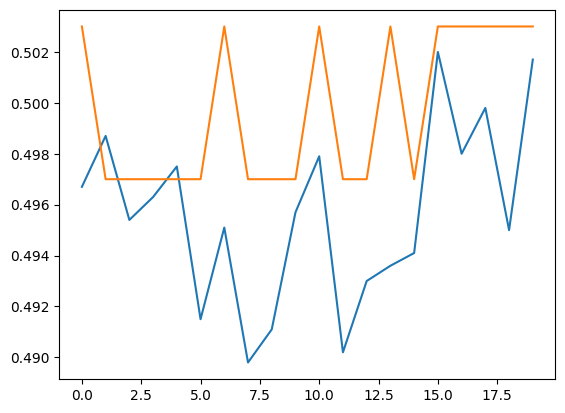

In [84]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [85]:
model.save("chatbot_model")

INFO:tensorflow:Assets written to: chatbot_model\assets


INFO:tensorflow:Assets written to: chatbot_model\assets


In [86]:
model.load_weights("chatbot_model")

In [87]:
predict_results = model.predict(([inputs_test,queries_test]))

32/32 [==============================] - 2s 10ms/step


In [88]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [89]:
story = ' '.join(word for word in test_data[0][0])
story

'Mary got the milk there . John moved to the bedroom .'

In [90]:
query = ' '.join(word for word in test_data[0][1])

In [91]:
query

'Is John in the kitchen ?'

In [92]:
test_data[0][2]

'no'

In [94]:
val_max = np.argmax(predict_results[0])

for key,val in tokenizer.word_index.items():
    if val==val_max:
        k = key
        
print("predicted answer is",k)
print('probability of certainity',predict_results[0][val_max])

predicted answer is no
probability of certainity 0.51835084
